In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [4]:
from func_gen import *
import sklearn
import torch
from params import parameters
import model_conf
import dataset_loader
import trainer

conf = parameters()
conf.tree_depth = 8
conf.use_prenet = True
conf.epochs = 100
conf.learning_rate = 0.1
conf.n_trees = 1

x,y = ugly_sine(range = (0,30),step=0.1)
tdl,vdl = dl_maker(x,y,conf)
data = dataset_loader.DataBunch(tdl,vdl,c=1,features4tree=1)

loss_func =  torch.nn.MSELoss()

learn = model_conf.Learner(*model_conf.get_model(conf,data), loss_func, data)

device = torch.device('cuda',0)
torch.cuda.set_device(device)

run = trainer.Runner(cb_funcs=conf.cbfs,conf=conf)
run.fit(conf.epochs, learn)

# run.wavelets.prune(even_cutoff=False)

# run.recorder.plot_lr()

# run.recorder.plot_lr()

# from training import trainer
# train = trainer(xt,yt)

train: [1.0802166687315375, tensor(1.0802, device='cuda:0')]
valid: [0.9816036802349668, tensor(0.9816, device='cuda:0')]
train: [0.8520389386077425, tensor(0.8520, device='cuda:0')]
valid: [0.9606854217221038, tensor(0.9607, device='cuda:0')]
train: [0.7565309135474969, tensor(0.7565, device='cuda:0')]
valid: [0.8838956428296638, tensor(0.8839, device='cuda:0')]
train: [0.6766065910680971, tensor(0.6766, device='cuda:0')]
valid: [0.7317234386097301, tensor(0.7317, device='cuda:0')]
train: [0.6151189851523632, tensor(0.6151, device='cuda:0')]
valid: [0.581838010537504, tensor(0.5818, device='cuda:0')]
train: [0.5727043341641402, tensor(0.5727, device='cuda:0')]
valid: [0.5287231676506273, tensor(0.5287, device='cuda:0')]
train: [0.5447330000388682, tensor(0.5447, device='cuda:0')]
valid: [0.5322491424252288, tensor(0.5322, device='cuda:0')]
train: [0.5229649709824898, tensor(0.5230, device='cuda:0')]
valid: [0.5330445260712595, tensor(0.5330, device='cuda:0')]
train: [0.501690195567572

train: [0.2976862779304163, tensor(0.2977, device='cuda:0')]
valid: [0.28184306982791785, tensor(0.2818, device='cuda:0')]
train: [0.29754843640683304, tensor(0.2975, device='cuda:0')]
valid: [0.28184709645280936, tensor(0.2818, device='cuda:0')]
train: [0.29741235989243237, tensor(0.2974, device='cuda:0')]
valid: [0.2818557854854699, tensor(0.2819, device='cuda:0')]
train: [0.2972788454881355, tensor(0.2973, device='cuda:0')]
valid: [0.28183827255711413, tensor(0.2818, device='cuda:0')]
train: [0.2971493355670379, tensor(0.2971, device='cuda:0')]
valid: [0.28182536423808396, tensor(0.2818, device='cuda:0')]
train: [0.2970236593217992, tensor(0.2970, device='cuda:0')]
valid: [0.2817345821496212, tensor(0.2817, device='cuda:0')]
train: [0.2968996721713697, tensor(0.2969, device='cuda:0')]
valid: [0.2815884291523635, tensor(0.2816, device='cuda:0')]
train: [0.2967761784643676, tensor(0.2968, device='cuda:0')]
valid: [0.28145628264456085, tensor(0.2815, device='cuda:0')]
train: [0.2966542

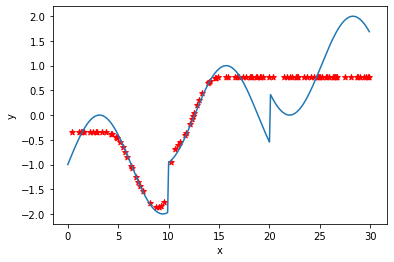

In [5]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("x")
ax.set_ylabel("y")
xx = learn.data.valid_dl.ds.x.numpy()
yy = learn.data.valid_dl.ds.y.numpy()
zz = run.recorder.tot_pred.cpu().numpy()
# plt.scatter(xx, yy, marker='^', label='ground truth',axes=ax)

plt.plot(x, y)
plt.scatter(xx, zz, marker='*',color='r')
# for j in range(len(run.wavelets.wavelet_pred_list)//30):
#     plt.scatter(xx, run.wavelets.wavelet_pred_list[30*j].cpu().numpy(), marker='*',label=run.wavelets.psi.cutoff_value_list[j],axes=ax)

# plt.title('wavelet approx.')

# ax.legend(["Ground Truth","5","300","450","600","750","900"])
# plt.show()


#learning rate 0.03
#tree depth 14

In [ ]:
import pandas as pd
pred_list = [i.tolist() for i in run.wavelets.wavelet_pred_list]
pred_df = pd.DataFrame(pred_list)
loss_df = pd.DataFrame(run.wavelets.wavelet_loss)
cutoff_df = pd.DataFrame(run.wavelets.psi.cutoff_value_list)

pred_df.to_csv('wav_pred.csv',index=False)
loss_df.to_csv('wav_loss.csv',index=False)
cutoff_df.to_csv('wav_cutoff.csv',index=False)

In [ ]:
loss_df

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("epochs")
ax.set_ylabel("loss")
run.recorder.plot_loss()

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
ax.set_xlabel("no. of wavelets/5")
ax.set_ylabel("loss")
loss_df.plot(ax=ax)

In [ ]:
(((pred_df.T[198]-yy)**2).sum())/100

In [ ]:
12//10